<a href="https://colab.research.google.com/github/Radhe-0/Practicas/blob/main/Machine%20Learning/Red_Neuronal_3(Regresion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Radhe-0/Generadores.git

Cloning into 'Generadores'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 139 (delta 76), reused 38 (delta 18), pack-reused 0
Receiving objects: 100% (139/139), 459.51 KiB | 13.51 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [2]:
%cd Generadores

/content/Generadores


In [3]:
# Importamos las librerías
from Generadores import *
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [81]:
# Carga de los datos
datos = DatosNoLineales(150)
df = pd.DataFrame(datos, columns=['X','Y'])

X = df['X'].to_numpy().reshape(-1,1)
Y = df['Y'].to_numpy()

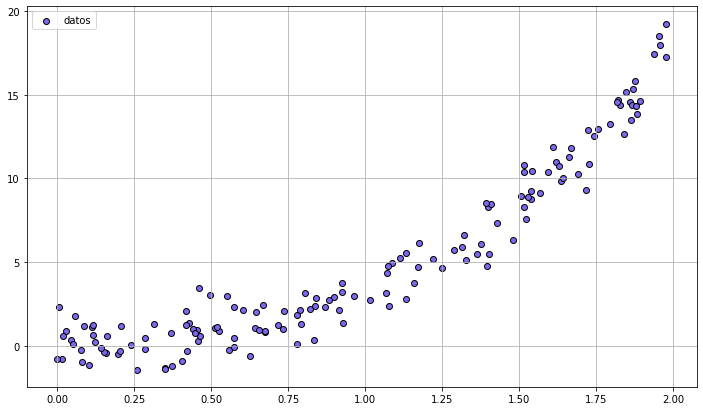

In [123]:
# Visualización de los datos
fig = plt.figure(figsize = (12,7))
ax = plt.subplot(1,1,1)
ax.scatter(X,Y,label='datos',edgecolors='black',color='mediumslateblue')
plt.legend()
plt.grid()
plt.show()

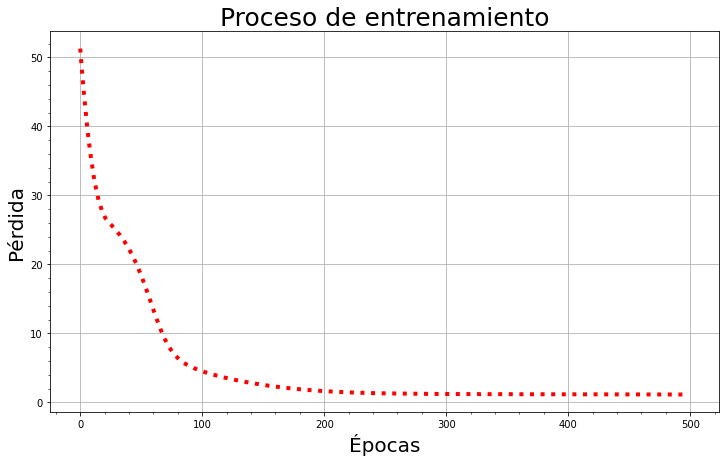

In [170]:
# Instancia y estructura del modelo
model = tf.keras.models.Sequential()

# Capa de entrada
model.add(tf.keras.layers.Dense(units=1, input_dim=1, activation='linear'))

# Capa profunda de 20 neuronas
model.add(tf.keras.layers.Dense(units=20,input_dim=1, activation='sigmoid'))

# Capa de salida
model.add(tf.keras.layers.Dense(units=1, input_dim=1, activation='linear'))

# Compilamos el modelo
optimizador = tf.keras.optimizers.Adam(0.004)
model.compile(loss='mse', optimizer=optimizador)

# Entrenamos el modelo
entrenamiento = model.fit(X,Y, verbose = False, epochs=500)

# Graficamos el proceso de entrenamiento
fig = plt.figure(figsize=(12,7))
plt.plot(entrenamiento.history['loss'], lw=4, ls=':',color='red')
plt.ylabel('Pérdida', fontsize=20)
plt.xlabel('Épocas', fontsize=20)
plt.title('Proceso de entrenamiento', fontsize=25)
plt.grid()
plt.minorticks_on()
plt.show()

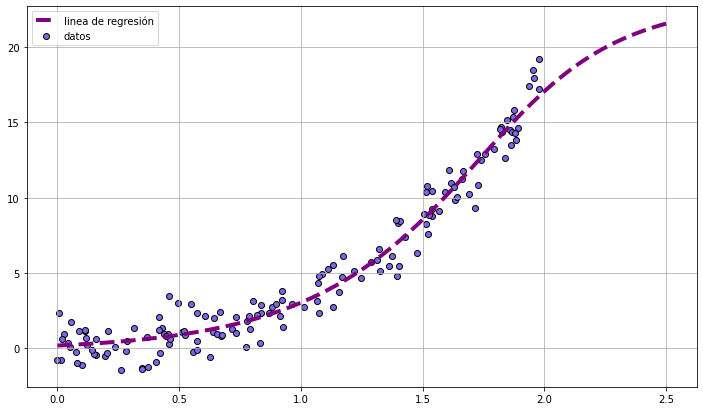

In [178]:
# Graficamos
xpred = np.linspace(0, 2.5, 200)
ypred = model.predict(xpred)

fig = plt.figure(figsize = (12,7))
ax = plt.subplot(1,1,1)
ax.scatter(X,Y,label='datos',edgecolors='black',color='mediumslateblue')
ax.plot(xpred, ypred, color='purple', lw=4, ls='--', label='linea de regresión')
plt.legend()
plt.grid()
plt.show()